<a href="https://colab.research.google.com/github/as4401s/Machine-Learning-Mathematics/blob/main/19_Image_compression_with_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

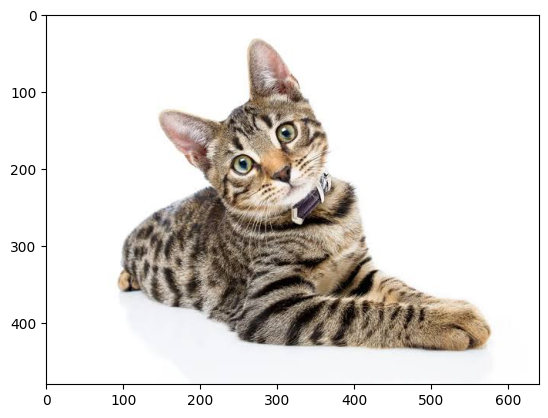

In [3]:
img = Image.open('images.jpeg')
_ = plt.imshow(img)

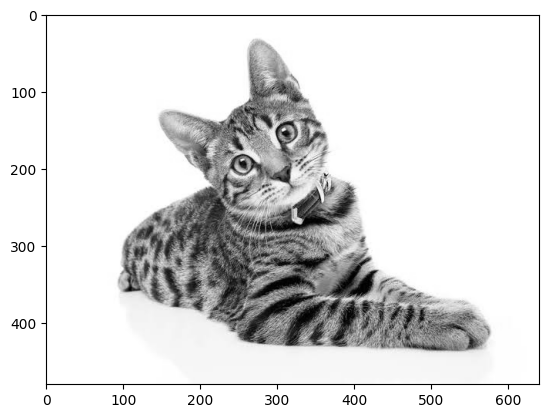

In [5]:
imggray= img.convert('LA')
_= plt.imshow(imggray)

### convert data to numpy matrix

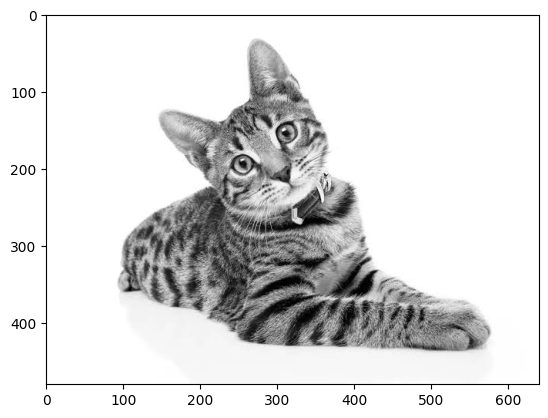

In [9]:
imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1],imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [10]:
# calculate SVD

U, sigma, V = np.linalg.svd(imgmat)

In [11]:
U

matrix([[ 5.20961395e-02,  5.17397097e-02,  2.27880007e-02, ...,
         -2.57243672e-05, -1.63782343e-06, -5.28606462e-02],
        [ 5.20961395e-02,  5.17397097e-02,  2.27880007e-02, ...,
          3.52979724e-04, -1.99065283e-03, -7.77287499e-02],
        [ 5.20961395e-02,  5.17397097e-02,  2.27880007e-02, ...,
         -1.59691582e-02,  6.34655186e-02,  7.20268865e-01],
        ...,
        [ 5.13600827e-02,  4.81851121e-02,  1.84009959e-02, ...,
          2.87645342e-13, -8.43226313e-14,  3.58314073e-13],
        [ 5.13936831e-02,  4.80540431e-02,  1.87650401e-02, ...,
          1.12807767e-13, -7.29137040e-14, -1.57211050e-13],
        [ 5.14093332e-02,  4.79980842e-02,  1.88814390e-02, ...,
         -5.81548698e-14,  6.58089035e-14, -3.93938354e-13]])

In [12]:
sigma

array([1.22439043e+05, 1.63151196e+04, 1.17089638e+04, 7.19889911e+03,
       6.93105022e+03, 4.56061748e+03, 4.43380571e+03, 3.92910840e+03,
       3.68866168e+03, 3.52927813e+03, 3.27197355e+03, 3.14439523e+03,
       2.80052054e+03, 2.49627342e+03, 2.42220715e+03, 2.30400978e+03,
       2.17077420e+03, 2.09181345e+03, 2.01031106e+03, 1.91774540e+03,
       1.86340022e+03, 1.82087370e+03, 1.71197829e+03, 1.62175847e+03,
       1.55279020e+03, 1.51029872e+03, 1.46941214e+03, 1.40835577e+03,
       1.37863225e+03, 1.31045397e+03, 1.25248422e+03, 1.21964913e+03,
       1.17084658e+03, 1.12438207e+03, 1.10230837e+03, 1.04289545e+03,
       1.02675886e+03, 1.02472659e+03, 9.99643637e+02, 9.62930673e+02,
       9.55998636e+02, 9.34606259e+02, 8.98190497e+02, 8.66629353e+02,
       8.51706491e+02, 8.46101411e+02, 8.36251552e+02, 8.06466716e+02,
       7.94061669e+02, 7.82738435e+02, 7.75113354e+02, 7.58805555e+02,
       7.39739575e+02, 7.26581279e+02, 7.20056518e+02, 7.13579442e+02,
      

In [13]:
V

matrix([[ 0.04530296,  0.04530296,  0.04530296, ...,  0.04530296,
          0.04530296,  0.04530296],
        [-0.03175878, -0.03175878, -0.03175878, ..., -0.03175878,
         -0.03175878, -0.03175878],
        [-0.03321451, -0.03321451, -0.03321451, ..., -0.03321451,
         -0.03321451, -0.03321451],
        ...,
        [-0.00999461, -0.00292267, -0.03115589, ...,  0.82121837,
         -0.14289477, -0.0191573 ],
        [-0.00616344, -0.00861929,  0.00287795, ..., -0.11335267,
          0.60225434, -0.19197598],
        [ 0.01066935,  0.01032589,  0.01939121, ...,  0.03381399,
         -0.21427105,  0.68207324]])

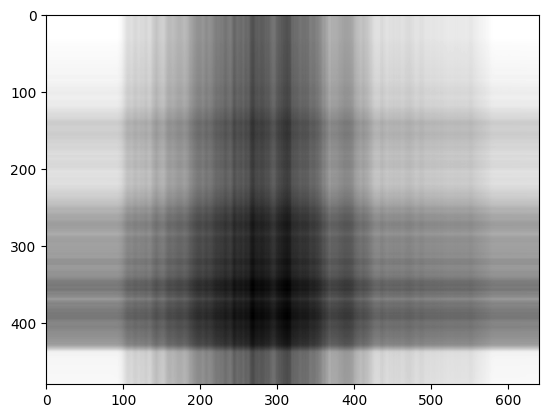

In [14]:
reconstimg = np.matrix(U[:,:1]*np.diag(sigma[:1])*np.matrix(V[:1,:]))
_ = plt.imshow(reconstimg, cmap='gray')

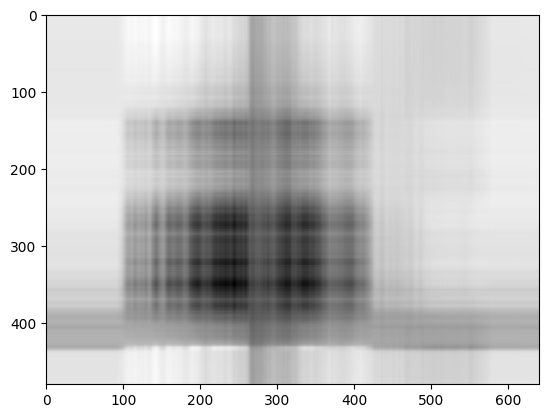

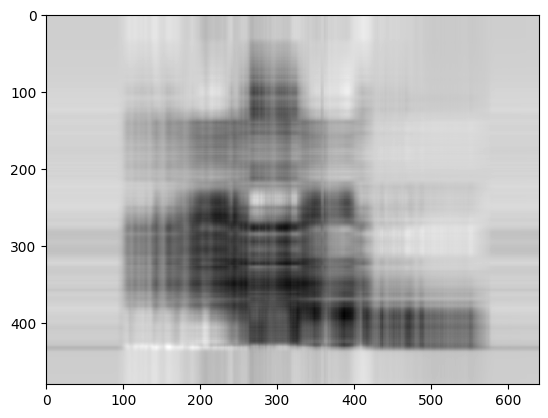

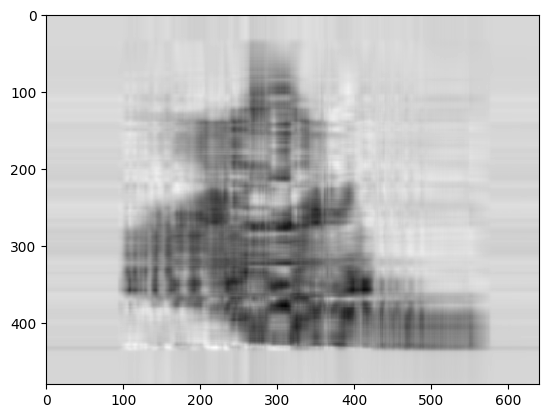

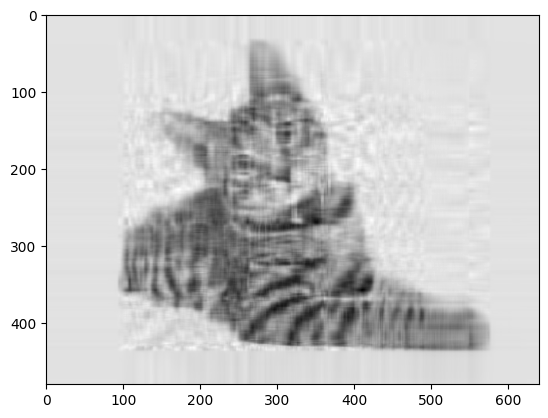

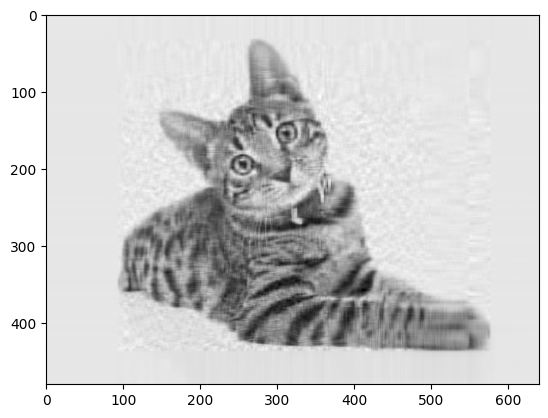

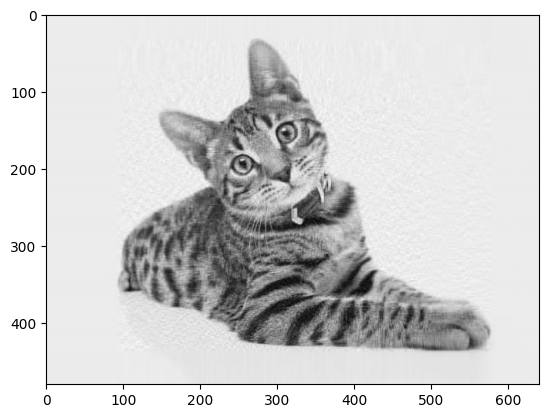

In [17]:
# use multiple singular vectors
for i in [2,4,8,16,32,64]:
    reconstimg = np.matrix(U[:,:i]*np.diag(sigma[:i])*np.matrix(V[:i,:]))
    plt.imshow(reconstimg, cmap='gray')
    plt.show()

In [18]:
imgmat.shape

(480, 640)

In [19]:
total_pixels = 480*640
total_pixels

307200

In [20]:
svd_64 = 64*480+64+64*640
svd_64

71744

In [21]:
svd_64/total_pixels

0.23354166666666668